#### Dataset

In [42]:
# letterdata.csv
# location: https://mitu.co.in/dataset

#### Import all libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [44]:
df = pd.read_csv('letterdata.csv')

In [45]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


#### Separate the input and output data

In [46]:
x = df.drop('letter', axis = 1)
y = df['letter']

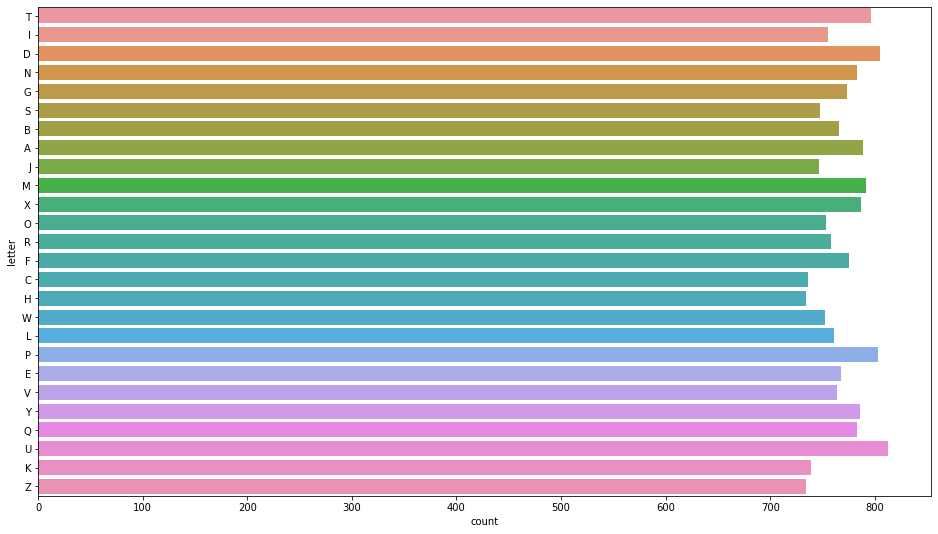

In [49]:
plt.figure(figsize=(16,9))
sns.countplot(y = y);

In [50]:
y.value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

#### Cross-validation

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.2)

In [55]:
x_train.shape

(16000, 16)

In [56]:
x_test.shape

(4000, 16)

#### Random Forest Classification

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier(random_state=0)

In [68]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

#### Performance Evaluation

In [69]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [70]:
y_pred = clf.predict(x_test)

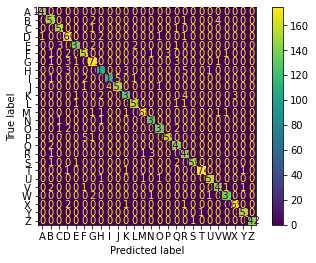

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [72]:
accuracy_score(y_test, y_pred)

0.96775

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      1.00      1.00       147
           B       0.94      0.96      0.95       158
           C       0.97      0.99      0.98       156
           D       0.93      0.97      0.95       171
           E       0.97      0.94      0.96       145
           F       0.95      0.95      0.95       167
           G       0.95      0.95      0.95       182
           H       0.94      0.90      0.92       123
           I       0.97      0.93      0.95       127
           J       0.97      0.96      0.97       159
           K       0.96      0.93      0.94       143
           L       0.98      0.98      0.98       159
           M       0.99      0.97      0.98       173
           N       0.96      0.99      0.97       134
           O       0.98      0.96      0.97       142
           P       0.98      0.96      0.97       165
           Q       0.93      0.99      0.96       145
           R       0.92    

In [74]:
new = pd.concat([x.iloc[67:68,:], x.iloc[767:768,:]])

In [75]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
67,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
767,3,9,5,6,3,5,4,2,8,6,1,10,0,6,3,7


In [76]:
clf.predict(new)

array(['E', 'L'], dtype=object)